In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline
# 目标函数

def real_func(x):
    return np.sin(2*np.pi*x)
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq




# 多项式
# ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

def fitting(M=0):
    """
    n 为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.01489891]


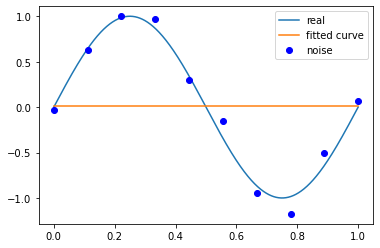

In [2]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.31195637  0.6708771 ]


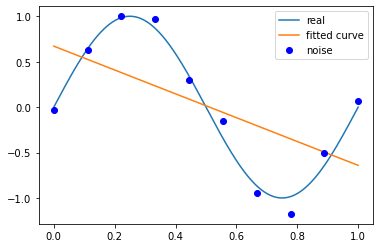

In [3]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [-0.019398   -1.29255839  0.66800334]


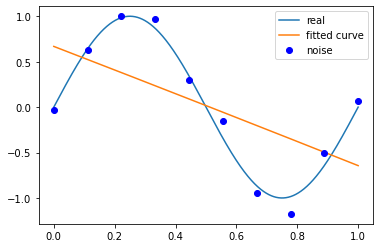

In [4]:
p_lsq_2 = fitting(M=2)

Fitting Parameters: [ 22.80814852 -34.23162201  11.68837678  -0.12042669]


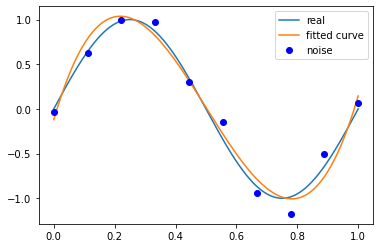

In [5]:
p_lsq_3 = fitting(M=3)

Fitting Parameters: [ 3.94920995e+04 -1.79303799e+05  3.41491996e+05 -3.54167975e+05
  2.17083206e+05 -7.96954590e+04  1.68818342e+04 -1.86856888e+03
  8.67703536e+01 -3.53640877e-02]


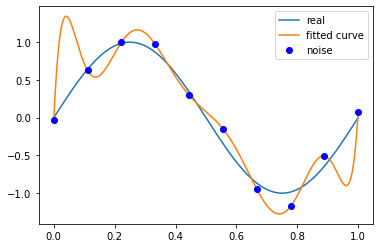

In [6]:
p_lsq_9 = fitting(M=9)

In [7]:
regularization = 0.0005

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret

# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

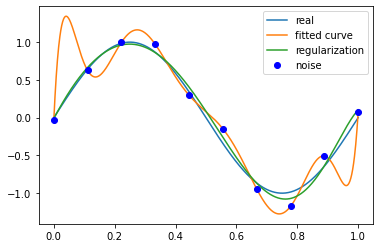

In [8]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()